# 用户消费行为分析

## 一、项目简介

数据来源：CDNow网站的用户在1997年1月1日至1998年6月30日期间内购买CD交易明细。  
数据集字段：用户ID，购买日期，订单数，订单金额。  
**目标**：通过各个指标对用户行为进行分析，更清楚了解用户行为习惯，为进一步制定营销策略提供依据。   

## 二、分析步骤

mermaid-diagram-20200821153859.png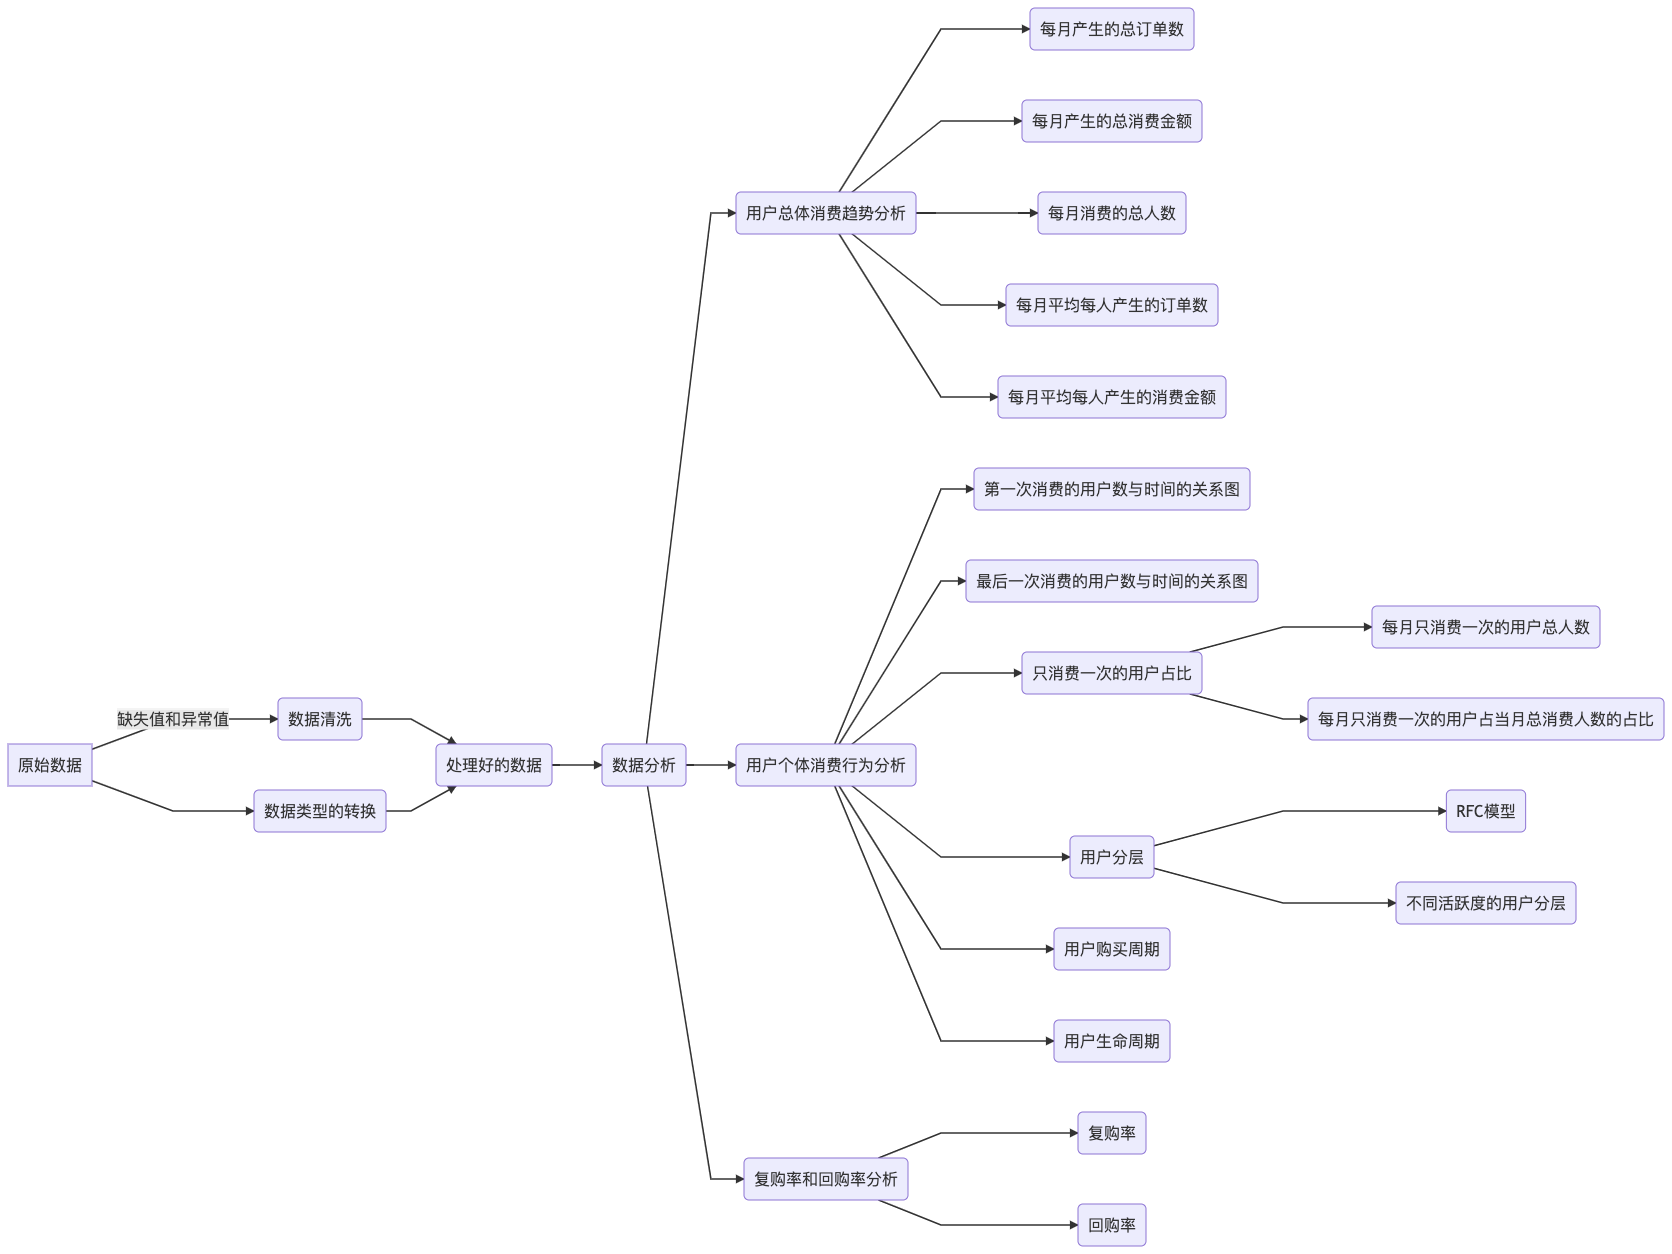

## 三、具体内容

### 1. 准备工作

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import time
import matplotlib as mpl 
import seaborn as sns
import pyecharts
import PIL.Image as image
import matplotlib.ticker as mtick  
from pyecharts.charts import Bar
from pyecharts import options as opts
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'CDNOW.txt'
data = pd.read_csv(file_path, names=["用户id","购买日期","订单数","金额"], sep = "\s+") # 原始数据不是用逗号进行分隔
data.head()

,用户id,购买日期,订单数,金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
用户id    69659 non-null int64
购买日期    69659 non-null int64
订单数     69659 non-null int64
金额      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


### 2. 数据预处理

#### 1. 数据清洗

In [4]:
# 检查数据是否有缺失值
data.isnull().sum()

用户id    0
购买日期    0
订单数     0
金额      0
dtype: int64

可以看到数据没有缺失值 不需要进行数据清洗

#### 2. 数据类型的转换

(1)连续性数据分组，然后定为1，2，3，...  
(2)把字符变为0，1，2，...  
(3)时间

In [5]:
# data_month = data["购买日期"].astype(str).str[4:6]
# data_month.head()

In [6]:
# 处理时间
data_date = pd.to_datetime(data["购买日期"], format= "%Y%m%d")
data_month = data_date.values.astype("datetime64[M]")
# data_month = data["购买日期"].astype(str).str[4:6]
data["购买日期"] = data_date
data["月份"] = data_month
data.head()

,用户id,购买日期,订单数,金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


### 3. 数据分析

#### 3.1 用户总体消费趋势分析

都是对月份进行操作 首先对数据以月份进行聚合 pivot_tble透视表 也可以用groupby

In [10]:
data_pivot = data.pivot_table(index="月份", 
                              values=["用户id","订单数","金额"],
                              aggfunc={
                                  "用户id":"count",
                                  "订单数":"sum",
                                  "金额":"sum"
                              })
data_pivot

,用户id,订单数,金额
月份,,,
1997-01-01,8928,19416,299060.17
1997-02-01,11272,24921,379590.03
1997-03-01,11598,26159,393155.27
1997-04-01,3781,9729,142824.49
1997-05-01,2895,7275,107933.30
1997-06-01,3054,7301,108395.87
1997-07-01,2942,8131,122078.88
1997-08-01,2320,5851,88367.69
1997-09-01,2296,5729,81948.80


#####  3.1.1 每月产生的总订单数

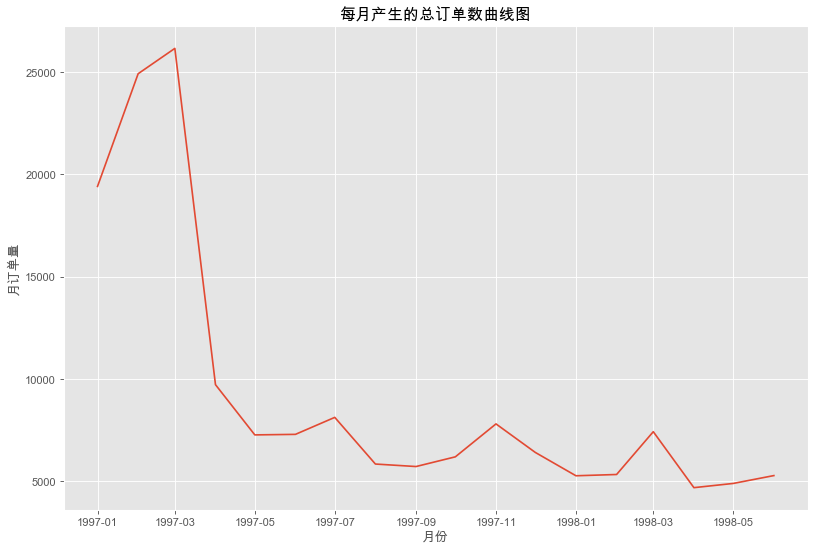

In [11]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(data_pivot["订单数"])
plt.xlabel('月份')
plt.ylabel('月订单量')
plt.title('每月产生的总订单数曲线图')
plt.show()

#####  3.1.2 每月产生的总消费金额

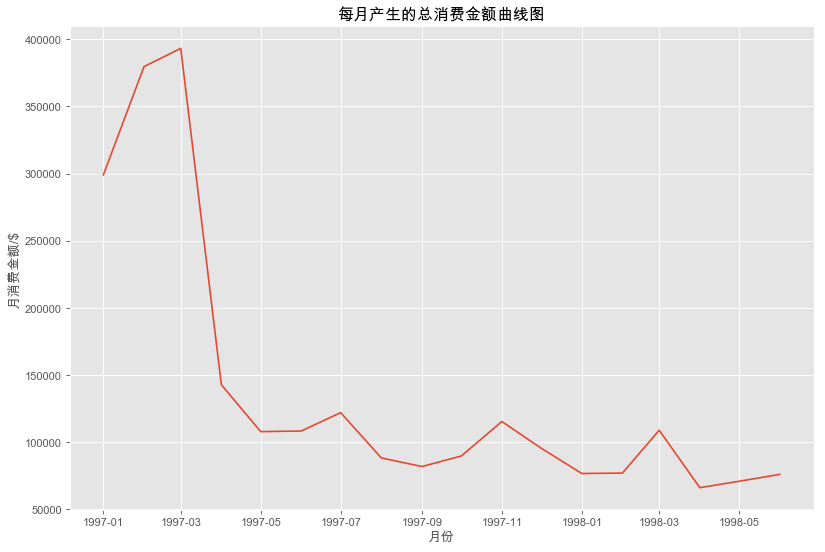

In [12]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(data_pivot["金额"])
plt.xlabel('月份')
plt.ylabel('月消费金额/$')
plt.title('每月产生的总消费金额曲线图')
plt.show()

#####  3.1.3 每月消费的总人数

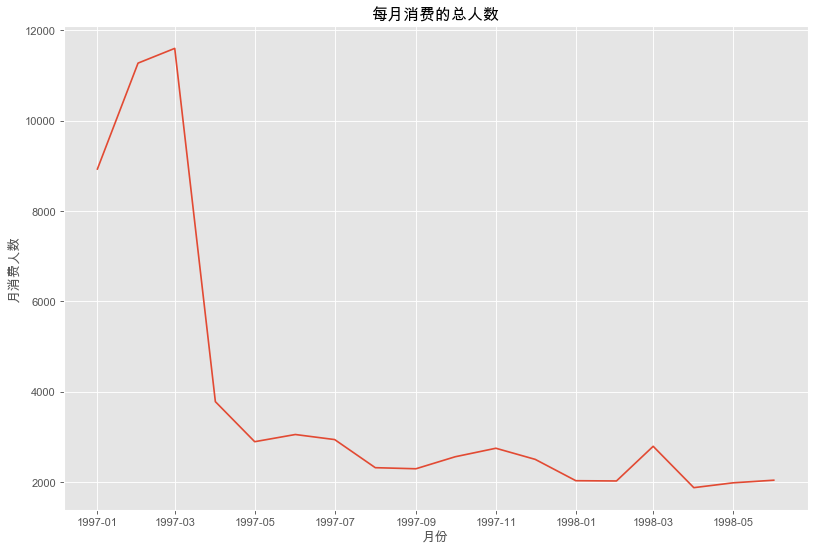

In [13]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(data_pivot["用户id"])
plt.xlabel('月份')
plt.ylabel('月消费人数')
plt.title('每月消费的总人数')
plt.show()

#####  3.1.4 每月平均每人的订单数

In [14]:
data_pivot["每月平均每人的订单数"] = data_pivot["订单数"]/data_pivot["用户id"]
data_pivot

,用户id,订单数,金额,每月平均每人的订单数
月份,,,,
1997-01-01,8928,19416,299060.17,2.174731
1997-02-01,11272,24921,379590.03,2.210877
1997-03-01,11598,26159,393155.27,2.255475
1997-04-01,3781,9729,142824.49,2.573129
1997-05-01,2895,7275,107933.30,2.512953
1997-06-01,3054,7301,108395.87,2.390635
1997-07-01,2942,8131,122078.88,2.763766
1997-08-01,2320,5851,88367.69,2.521983
1997-09-01,2296,5729,81948.80,2.495209


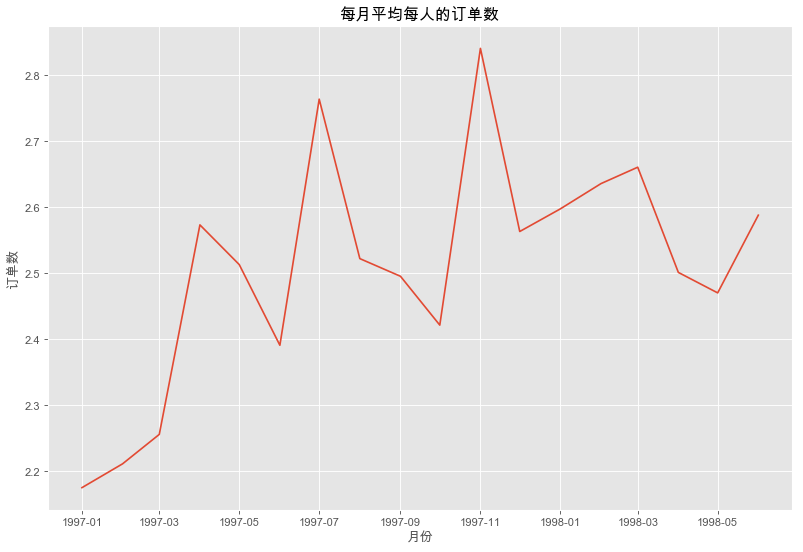

In [15]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(data_pivot["每月平均每人的订单数"])
plt.xlabel('月份')
plt.ylabel('订单数')
plt.title('每月平均每人的订单数')
plt.show()

#####  3.1.5 每月平均每人产生的消费金额

In [16]:
data_pivot["每月平均每人产生的消费金额"] = data_pivot["金额"]/data_pivot["用户id"]
data_pivot

,用户id,订单数,金额,每月平均每人的订单数,每月平均每人产生的消费金额
月份,,,,,
1997-01-01,8928,19416,299060.17,2.174731,33.496883
1997-02-01,11272,24921,379590.03,2.210877,33.675482
1997-03-01,11598,26159,393155.27,2.255475,33.898540
1997-04-01,3781,9729,142824.49,2.573129,37.774263
1997-05-01,2895,7275,107933.30,2.512953,37.282660
1997-06-01,3054,7301,108395.87,2.390635,35.493081
1997-07-01,2942,8131,122078.88,2.763766,41.495201
1997-08-01,2320,5851,88367.69,2.521983,38.089522
1997-09-01,2296,5729,81948.80,2.495209,35.691986


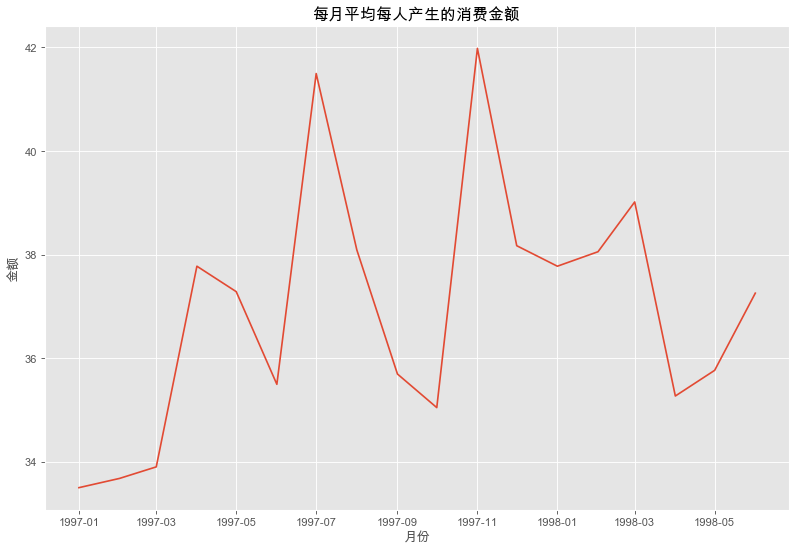

In [17]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(data_pivot["每月平均每人产生的消费金额"])
plt.xlabel('月份')
plt.ylabel('金额')
plt.title('每月平均每人产生的消费金额')
plt.show()

In [18]:
data_pivot.rename(
    columns={
        "用户id":"每月消费的总人数",
        "订单数":"每月产生的总订单",
        "金额":"每月产生的总消费金额",
    },
    inplace = True
)
data_month = data_pivot
data_month

,每月消费的总人数,每月产生的总订单,每月产生的总消费金额,每月平均每人的订单数,每月平均每人产生的消费金额
月份,,,,,
1997-01-01,8928,19416,299060.17,2.174731,33.496883
1997-02-01,11272,24921,379590.03,2.210877,33.675482
1997-03-01,11598,26159,393155.27,2.255475,33.898540
1997-04-01,3781,9729,142824.49,2.573129,37.774263
1997-05-01,2895,7275,107933.30,2.512953,37.282660
1997-06-01,3054,7301,108395.87,2.390635,35.493081
1997-07-01,2942,8131,122078.88,2.763766,41.495201
1997-08-01,2320,5851,88367.69,2.521983,38.089522
1997-09-01,2296,5729,81948.80,2.495209,35.691986


#### 3.2 用户个体消费行为分析

##### 3.2.1 第一次消费的用户人数与时间的关系

In [19]:
data_pivot1 = data.pivot_table(index="用户id", 
                               values="购买日期",
                               aggfunc={
                                  "购买日期":"min"
                               })
data_pivot1.rename(
    columns={
        "购买日期":"第一次消费的时间"
    },
    inplace = True
)
data_pivot1.head(10)

,第一次消费的时间
用户id,
1,1997-01-01
2,1997-01-12
3,1997-01-02
4,1997-01-01
5,1997-01-01
6,1997-01-01
7,1997-01-01
8,1997-01-01
9,1997-01-01


In [20]:
# 统计相同日期下第一次消费的用户人数
data_user_firstdate = data_pivot1.iloc[:,0].value_counts()
data_user_firstdate.head(10)

1997-02-08    363
1997-02-24    347
1997-02-04    346
1997-02-06    346
1997-03-04    340
1997-02-27    339
1997-03-06    337
1997-02-03    335
1997-02-17    332
1997-02-25    328
Name: 第一次消费的时间, dtype: int64

In [21]:
data_user_firstdate_list = data_user_firstdate.values.tolist()
data_user_firstdate_max = max(data_user_firstdate_list)
data_user_firstdate_max_index = data_user_firstdate_list.index(data_user_firstdate_max)
data_user_firstdate_min = min(data_user_firstdate_list)
data_user_firstdate_min_index = data_user_firstdate_list.index(data_user_firstdate_min)

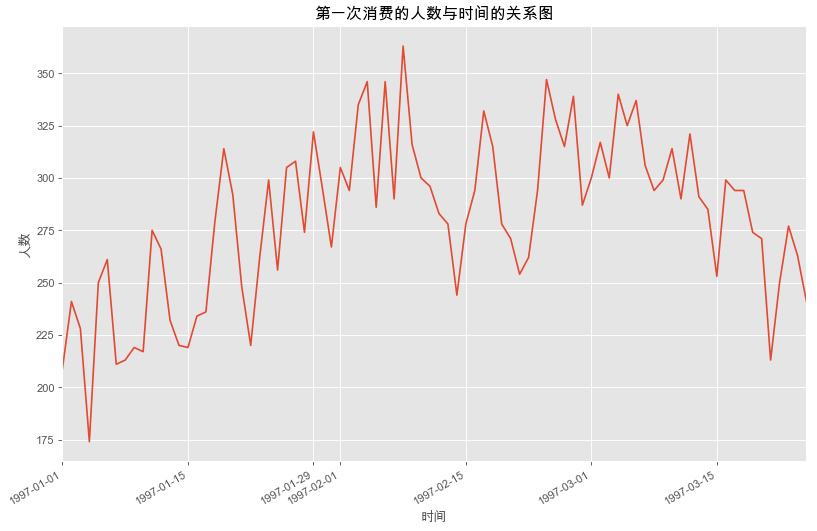

In [22]:
plt.figure(figsize=(12, 8), dpi=80)
# plt.plot(data_user_firstdate)
data_user_firstdate.plot()
plt.xlabel('时间')
plt.ylabel('人数')
plt.title('第一次消费的人数与时间的关系图')
plt.show()

由图可以看出，大概在97年3月末之后就没有新增用户了

##### 3.2.2 最后一次消费的用户人数与时间的关系

In [23]:
data_pivot2 = data.pivot_table(index="用户id", 
                               values="购买日期",
                               aggfunc={
                                  "购买日期":"max"
                               })
data_pivot2.rename(
    columns={
        "购买日期":"最后一次消费的时间"
    },
    inplace = True
)
data_pivot2.head(10)

,最后一次消费的时间
用户id,
1,1997-01-01
2,1997-01-12
3,1998-05-28
4,1997-12-12
5,1998-01-03
6,1997-01-01
7,1998-03-22
8,1998-03-29
9,1998-06-08


In [24]:
# 统计相同日期下最后一次消费的用户人数
data_user_lastdate = data_pivot2.iloc[:,0].value_counts()
data_user_lastdate.head(10)

1997-02-08    221
1997-03-12    213
1997-02-04    210
1997-03-06    204
1997-02-27    202
1997-02-10    202
1997-03-04    201
1997-02-03    196
1997-02-25    195
1997-02-01    192
Name: 最后一次消费的时间, dtype: int64

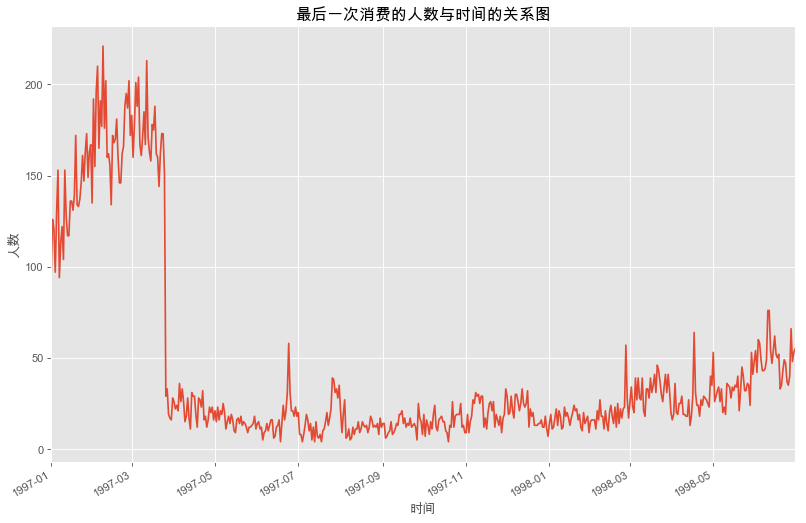

In [25]:
plt.figure(figsize=(12, 8), dpi=80)
# plt.plot(data_user_firstdate)
data_user_lastdate.plot()
plt.xlabel('时间')
plt.ylabel('人数')
plt.title('最后一次消费的人数与时间的关系图')
plt.show()

##### 3.2.3 只消费一次的用户占比

###### 3.2.3.1 每月只消费一次的用户总人数

首先找到只消费1次的用户  如果用户 最后一次消费的时间 == 第一次消费的时间  认为消费一次

In [26]:
data_user_firstdate

1997-02-08    363
1997-02-24    347
1997-02-04    346
1997-02-06    346
1997-03-04    340
1997-02-27    339
1997-03-06    337
1997-02-03    335
1997-02-17    332
1997-02-25    328
1997-03-05    325
1997-01-29    322
1997-03-12    321
1997-03-02    317
1997-02-09    316
1997-02-26    315
1997-02-18    315
1997-03-10    314
1997-01-19    314
1997-01-27    308
1997-03-07    306
1997-02-01    305
1997-01-26    305
1997-03-01    300
1997-03-03    300
1997-02-10    300
1997-03-09    299
1997-03-16    299
1997-01-24    299
1997-02-11    296
             ... 
1997-03-20    271
1997-01-31    267
1997-01-12    266
1997-03-24    263
1997-01-23    262
1997-02-22    262
1997-01-06    261
1997-01-25    256
1997-02-21    254
1997-03-15    253
1997-03-22    250
1997-01-05    250
1997-01-21    248
1997-02-14    244
1997-01-02    241
1997-03-25    241
1997-01-17    236
1997-01-16    234
1997-01-13    232
1997-01-03    228
1997-01-22    220
1997-01-14    220
1997-01-09    219
1997-01-15    219
1997-01-10

In [27]:
data_first_last = pd.concat([data_pivot1, data_pivot2], axis = 1)
data_first_last.head

<bound method NDFrame.head of         第一次消费的时间  最后一次消费的时间
用户id                       
1     1997-01-01 1997-01-01
2     1997-01-12 1997-01-12
3     1997-01-02 1998-05-28
4     1997-01-01 1997-12-12
5     1997-01-01 1998-01-03
6     1997-01-01 1997-01-01
7     1997-01-01 1998-03-22
8     1997-01-01 1998-03-29
9     1997-01-01 1998-06-08
10    1997-01-21 1997-01-21
11    1997-01-01 1998-02-20
12    1997-01-01 1997-01-01
13    1997-01-01 1997-01-01
14    1997-01-01 1997-01-01
15    1997-01-01 1997-01-01
16    1997-01-01 1997-09-10
17    1997-01-01 1997-01-01
18    1997-01-04 1997-01-04
19    1997-01-01 1997-06-10
20    1997-01-01 1997-01-18
21    1997-01-01 1997-01-13
22    1997-01-01 1997-01-01
23    1997-01-01 1997-01-01
24    1997-01-01 1998-01-20
25    1997-01-01 1998-06-08
26    1997-01-01 1997-01-26
27    1997-01-07 1997-01-12
28    1997-01-01 1997-03-08
29    1997-01-01 1998-04-26
30    1997-01-01 1997-02-14
...          ...        ...
23541 1997-03-25 1997-04-02
23542 1997-03-25 1

In [28]:
data_only_once = data_first_last[data_first_last["第一次消费的时间"]==data_first_last["最后一次消费的时间"]]
data_only_once

,第一次消费的时间,最后一次消费的时间
用户id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
6,1997-01-01,1997-01-01
10,1997-01-21,1997-01-21
12,1997-01-01,1997-01-01
13,1997-01-01,1997-01-01
14,1997-01-01,1997-01-01
15,1997-01-01,1997-01-01
17,1997-01-01,1997-01-01


In [29]:
# 统计相同日期下只消费一次的用户人数
data_only_once_count = data_only_once.iloc[:,0].value_counts()
data_only_once_count

1997-02-08    199
1997-02-04    196
1997-03-12    181
1997-02-06    181
1997-02-03    178
1997-02-27    177
1997-03-06    177
1997-02-10    174
1997-03-04    173
1997-02-01    173
1997-02-24    171
1997-02-25    169
1997-02-18    166
1997-03-01    166
1997-01-19    166
1997-02-26    164
1997-03-05    163
1997-03-03    162
1997-02-09    160
1997-02-07    160
1997-01-30    159
1997-01-27    158
1997-01-26    158
1997-02-15    157
1997-03-10    155
1997-03-16    154
1997-02-17    154
1997-01-29    154
1997-02-23    153
1997-03-18    152
             ... 
1997-03-22    135
1997-03-24    135
1997-03-20    134
1997-01-25    133
1997-03-15    133
1997-01-16    132
1997-01-05    129
1997-01-18    127
1997-02-21    126
1997-01-21    125
1997-01-15    125
1997-01-02    124
1997-01-31    124
1997-01-22    124
1997-02-20    124
1997-01-20    124
1997-01-12    123
1997-01-17    121
1997-03-25    119
1997-01-03    119
1997-01-09    119
1997-03-21    117
1997-02-14    114
1997-01-13    112
1997-01-14

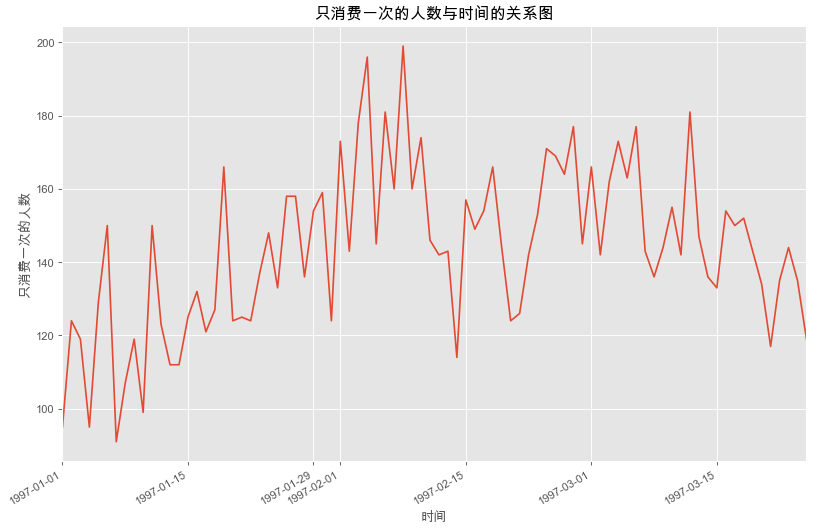

In [30]:
plt.figure(figsize=(12, 8), dpi=80)
data_only_once_count.plot()
plt.xlabel('时间')
plt.ylabel('只消费一次的人数')
plt.title('只消费一次的人数与时间的关系图')
plt.show()

In [31]:
# concat聚合只能针对数组 进行变换
data_only_once_count = pd.DataFrame({
    "日期":data_only_once_count.index,
    "人数":data_only_once_count
})
data_only_once_count

,日期,人数
1997-02-08,1997-02-08,199
1997-02-04,1997-02-04,196
1997-03-12,1997-03-12,181
1997-02-06,1997-02-06,181
1997-02-03,1997-02-03,178
1997-02-27,1997-02-27,177
1997-03-06,1997-03-06,177
1997-02-10,1997-02-10,174
1997-03-04,1997-03-04,173
1997-02-01,1997-02-01,173


In [32]:
# 把日期的类型变成月份
data_only_once_count["月份"] = data_only_once_count["日期"].values.astype("datetime64[M]")
data_only_once_count

,日期,人数,月份
1997-02-08,1997-02-08,199,1997-02-01
1997-02-04,1997-02-04,196,1997-02-01
1997-03-12,1997-03-12,181,1997-03-01
1997-02-06,1997-02-06,181,1997-02-01
1997-02-03,1997-02-03,178,1997-02-01
1997-02-27,1997-02-27,177,1997-02-01
1997-03-06,1997-03-06,177,1997-03-01
1997-02-10,1997-02-10,174,1997-02-01
1997-03-04,1997-03-04,173,1997-03-01
1997-02-01,1997-02-01,173,1997-02-01


In [33]:
data_only_once_count_pivot = data_only_once_count.pivot_table(
                                                                index = "月份",
                                                                values = "人数",
                                                                aggfunc={
                                                                    "人数":"sum"
                                                                }
                                                            )

In [34]:
data_only_once_count_pivot

,人数
月份,
1997-01-01,3976
1997-02-01,4395
1997-03-01,3683


###### 3.2.3.2 每月只消费一次的用户占当月总消费人数的占比

In [35]:
data_percent = data_only_once_count_pivot.iloc[:,0]/data_pivot.iloc[:,0]
data_percent

月份
1997-01-01    0.445341
1997-02-01    0.389904
1997-03-01    0.317555
1997-04-01         NaN
1997-05-01         NaN
1997-06-01         NaN
1997-07-01         NaN
1997-08-01         NaN
1997-09-01         NaN
1997-10-01         NaN
1997-11-01         NaN
1997-12-01         NaN
1998-01-01         NaN
1998-02-01         NaN
1998-03-01         NaN
1998-04-01         NaN
1998-05-01         NaN
1998-06-01         NaN
dtype: float64

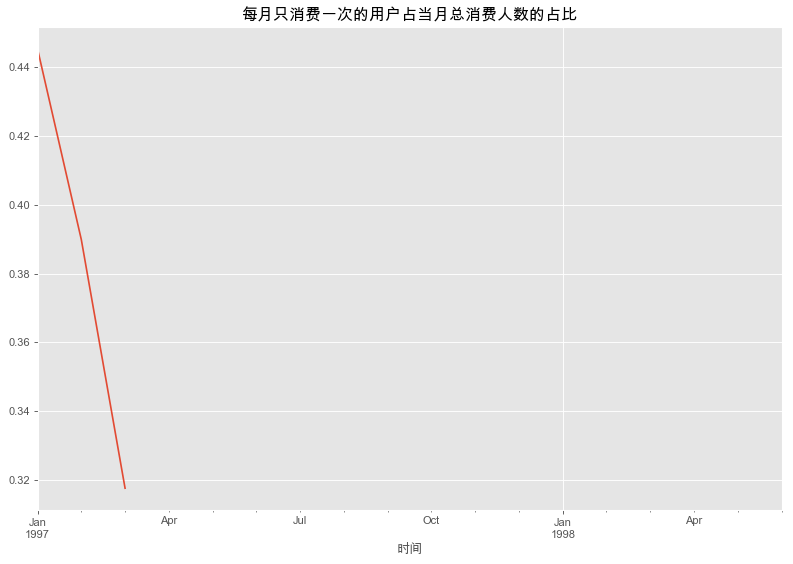

In [36]:
plt.figure(figsize=(12, 8), dpi=80)
data_percent.plot()
plt.xlabel('时间')
plt.title('每月只消费一次的用户占当月总消费人数的占比')
plt.show()

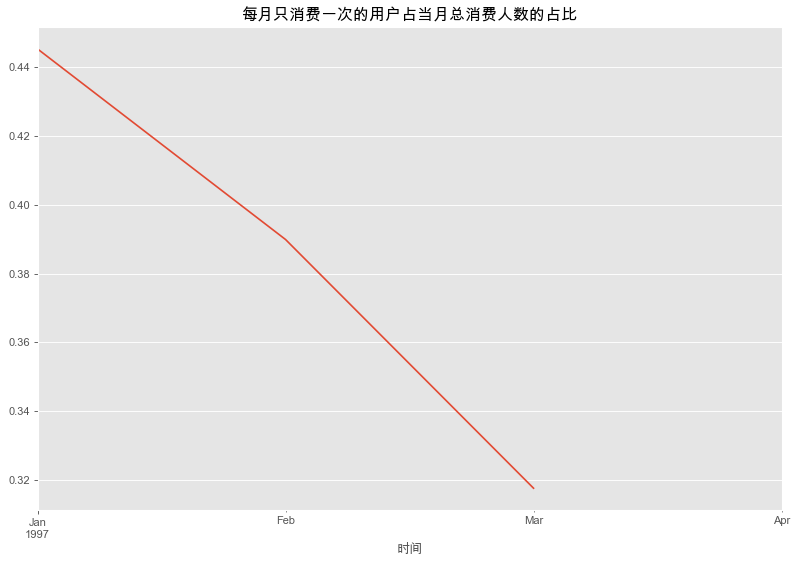

月份
1997-01-01    0.445341
1997-02-01    0.389904
1997-03-01    0.317555
dtype: float64


In [37]:
plt.figure(figsize=(12, 8), dpi=80)
data_percent[:4].plot()
plt.xlabel('时间')
plt.title('每月只消费一次的用户占当月总消费人数的占比')
plt.show()
print(data_percent[:3])

##### 3.2.4 用户分层

###### 3.2.4.1 RFM模型

R: Recency   最近一次消费时间  
F: Frequency 消费频率  
M: Monetary  消费金额

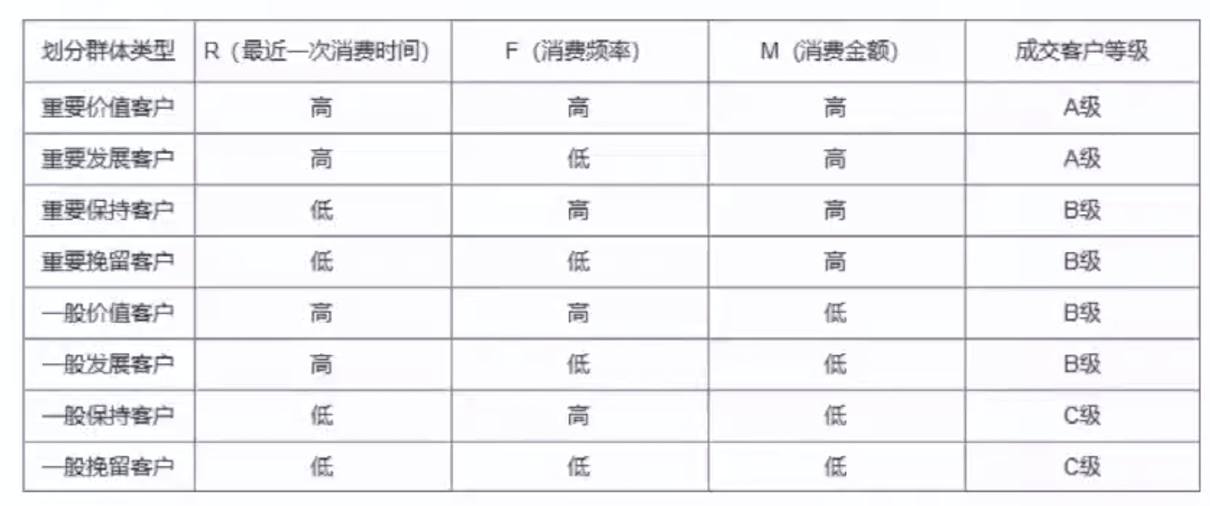

In [38]:
data.head()

,用户id,购买日期,订单数,金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [69]:
rfm = data.pivot_table(index = '用户id',
                     values = ['金额','订单数','购买日期'],
                     aggfunc = {
                         '金额':'sum',
                         '订单数':'sum',
                         '购买日期':'max'}
                      )
rfm.head(20)

,订单数,购买日期,金额
用户id,,,
1,1,1997-01-01,11.77
2,6,1997-01-12,89.00
3,16,1998-05-28,156.46
4,7,1997-12-12,100.50
5,29,1998-01-03,385.61
6,1,1997-01-01,20.99
7,18,1998-03-22,264.67
8,18,1998-03-29,197.66
9,6,1998-06-08,95.85


In [70]:
rfm['R'] = -(rfm["购买日期"] - rfm["购买日期"].max()) / np.timedelta64(1,'D')
rfm.rename(columns = {
    '订单数':'F',
    '金额':'M'
},inplace = True)

In [71]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x>1 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x - x.mean()).apply(rfm_func,axis = 1)
#将用户在R、F、M三个维度上分为低于平均额度和高于平均额度的用户（划分标准根据不同业务设计不同）:

In [72]:
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,182,1767.11,8512.0
一般保持客户,492,5100.77,7782.0
一般发展客户,29915,445233.28,6983699.0
一般挽留客户,15428,215075.77,621894.0
重要价值客户,9849,147180.09,286676.0
重要保持客户,105509,1555586.51,476502.0
重要发展客户,2322,49905.80,174340.0
重要挽留客户,4184,80466.30,96009.0


In [73]:
## 看看每个标签下用户的数量
rfm["label"].value_counts()

一般发展客户    14138
重要保持客户     4267
一般挽留客户     3493
重要价值客户      631
重要挽留客户      599
重要发展客户      371
一般保持客户       53
一般价值客户       18
Name: label, dtype: int64

In [74]:
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,182,1767.11,8512.0
一般保持客户,492,5100.77,7782.0
一般发展客户,29915,445233.28,6983699.0
一般挽留客户,15428,215075.77,621894.0
重要价值客户,9849,147180.09,286676.0
重要保持客户,105509,1555586.51,476502.0
重要发展客户,2322,49905.80,174340.0
重要挽留客户,4184,80466.30,96009.0


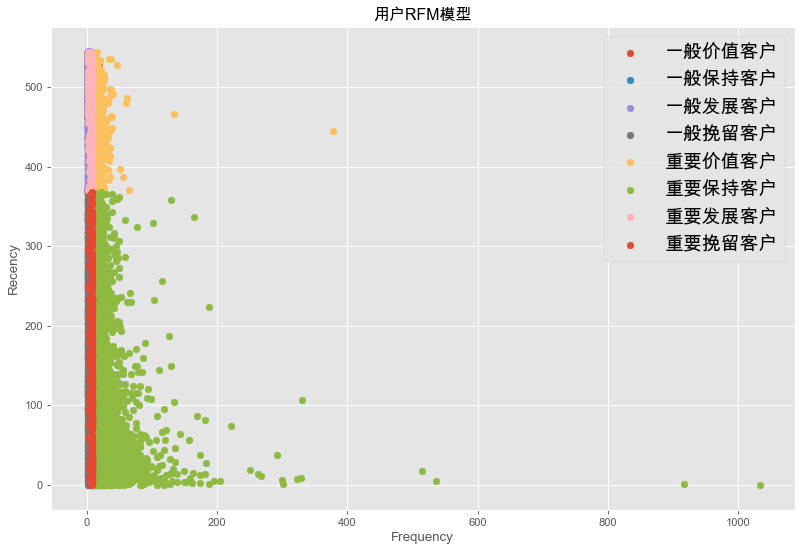

In [81]:
plt.figure(figsize=(12, 8), dpi=80)
for label,gropued in rfm.groupby('label'):
    x= gropued['F']
    y = gropued['R']
    
    plt.scatter(x,y,label = label) # 利用循环绘制函数
plt.legend(loc='best',prop={"size" : 17}) # 图例位置
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('用户RFM模型')
plt.show()


从图中可以看到:  
从 RFM 分层可知，大部分用户为重要保持客户和一般发展客户,且购买频次基本在在200以内。

###### 3.2.4.2 不同活跃度的用户分层

将用户划分为：未注册、新用户、活跃用户、不活跃用户、回流用户、持续活跃用户、流失用户  
活跃度的判别方法：
mermaid-diagram-20200821134343.png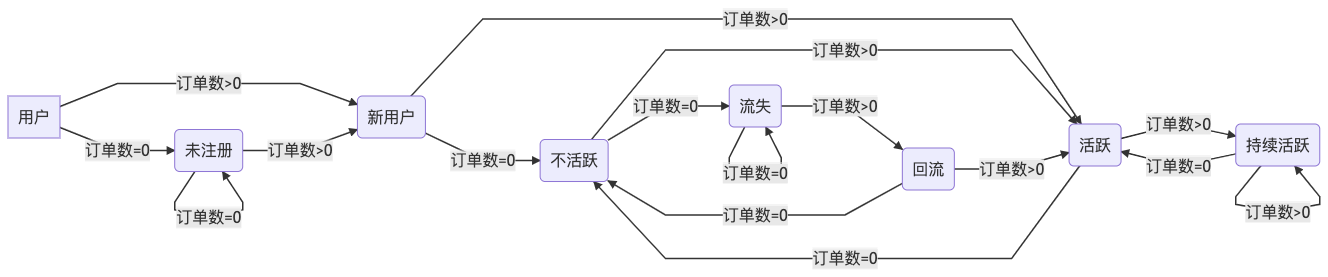

In [7]:
orders = data.pivot_table(
    index = "用户id",
    values="订单数",
    columns="月份",
    aggfunc={
        "订单数":"sum"
    }
).fillna(0)
orders

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,3.0,0.0,3.0,3.0,2.0,2.0,0.0,3.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [8]:
# 标记不同活跃度标签
orders.iloc[:,0][orders.iloc[:,0]!=0] = "新用户"
orders.iloc[:,0][orders.iloc[:,0]==0] = "未注册"

for i in range(1, len(orders.iloc[0,:])):
    orders.iloc[:,i][(orders.iloc[:,i-1]=="未注册")&(orders.iloc[:,i]!=0)] = "新用户"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="未注册")&(orders.iloc[:,i]==0)] = "未注册"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="新用户")&(orders.iloc[:,i]!=0)] = "活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="新用户")&(orders.iloc[:,i]==0)] = "不活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="不活跃")&(orders.iloc[:,i]!=0)] = "活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="不活跃")&(orders.iloc[:,i]==0)] = "流失"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="流失")&(orders.iloc[:,i]!=0)] = "回流"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="流失")&(orders.iloc[:,i]==0)] = "流失"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="回流")&(orders.iloc[:,i]!=0)] = "活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="回流")&(orders.iloc[:,i]==0)] = "不活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="活跃")&(orders.iloc[:,i]!=0)] = "持续活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="活跃")&(orders.iloc[:,i]==0)] = "不活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="持续活跃")&(orders.iloc[:,i]!=0)] = "持续活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="持续活跃")&(orders.iloc[:,i]==0)] = "活跃"

orders

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户id,,,,,,,,,,,,,,,,,,
1,新用户,不活跃,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失
2,新用户,不活跃,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失
3,新用户,不活跃,活跃,持续活跃,活跃,不活跃,流失,流失,流失,流失,回流,不活跃,流失,流失,流失,流失,回流,不活跃
4,新用户,不活跃,流失,流失,流失,流失,流失,回流,不活跃,流失,流失,回流,不活跃,流失,流失,流失,流失,流失
5,新用户,活跃,不活跃,活跃,持续活跃,持续活跃,持续活跃,活跃,持续活跃,活跃,不活跃,活跃,持续活跃,活跃,不活跃,流失,流失,流失
6,新用户,不活跃,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失
7,新用户,不活跃,流失,流失,流失,流失,流失,流失,流失,回流,不活跃,流失,流失,流失,回流,不活跃,流失,流失
8,新用户,活跃,不活跃,流失,流失,回流,活跃,不活跃,流失,流失,回流,活跃,不活跃,流失,回流,不活跃,流失,流失
9,新用户,不活跃,流失,流失,回流,不活跃,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,回流


In [9]:
# 统计每个月不同状态的用户数
counts = orders.apply(lambda x:pd.value_counts(x)).fillna(0)
counts

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
不活跃,0.0,6689.0,7952.0,7558.0,1711.0,1323.0,1500.0,1506.0,1174.0,1172.0,1123.0,1285.0,1266.0,1006.0,939.0,1418.0,926.0,970.0
回流,0.0,0.0,0.0,352.0,583.0,1167.0,1074.0,835.0,849.0,985.0,1033.0,937.0,733.0,794.0,1152.0,685.0,669.0,798.0
持续活跃,0.0,0.0,369.0,741.0,834.0,755.0,650.0,537.0,477.0,480.0,504.0,486.0,463.0,415.0,470.0,409.0,412.0,415.0
新用户,7846.0,8476.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
未注册,15724.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
活跃,0.0,1157.0,1907.0,1922.0,1199.0,836.0,841.0,745.0,711.0,602.0,707.0,690.0,581.0,563.0,603.0,573.0,602.0,478.0
流失,0.0,0.0,6094.0,12997.0,19243.0,19489.0,19505.0,19947.0,20359.0,20331.0,20203.0,20172.0,20527.0,20792.0,20406.0,20485.0,20961.0,20909.0


In [54]:
counts_T = counts.T
counts_T

,不活跃,回流,持续活跃,新用户,未注册,活跃,流失
月份,,,,,,,
1997-01-01,0.0,0.0,0.0,7846.0,15724.0,0.0,0.0
1997-02-01,6689.0,0.0,0.0,8476.0,7248.0,1157.0,0.0
1997-03-01,7952.0,0.0,369.0,7248.0,0.0,1907.0,6094.0
1997-04-01,7558.0,352.0,741.0,0.0,0.0,1922.0,12997.0
1997-05-01,1711.0,583.0,834.0,0.0,0.0,1199.0,19243.0
1997-06-01,1323.0,1167.0,755.0,0.0,0.0,836.0,19489.0
1997-07-01,1500.0,1074.0,650.0,0.0,0.0,841.0,19505.0
1997-08-01,1506.0,835.0,537.0,0.0,0.0,745.0,19947.0
1997-09-01,1174.0,849.0,477.0,0.0,0.0,711.0,20359.0


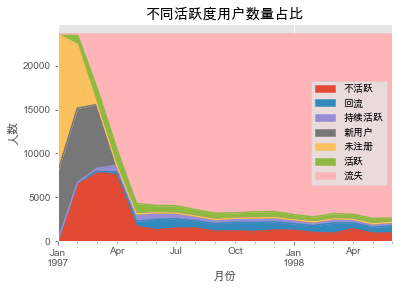

In [87]:
counts_T.plot.area()
plt.title("不同活跃度用户数量占比")
plt.ylabel("人数")
plt.show()

###### 3.2.4.5 用户购买周期（按订单）

In [10]:
data.head()

,用户id,购买日期,订单数,金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [11]:
grouped_user = data.groupby('用户id')

In [12]:
# 订单时间间隔
order_diff = grouped_user.apply(lambda x:x["购买日期"] - x["购买日期"].shift())
order_diff.head(10)

用户id   
1     0        NaT
2     1        NaT
      2     0 days
3     3        NaT
      4    87 days
      5     3 days
      6   227 days
      7    10 days
      8   184 days
4     9        NaT
Name: 购买日期, dtype: timedelta64[ns]

In [13]:
order_diff.mean()

Timedelta('68 days 23:22:13.567662')

/Users/guo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


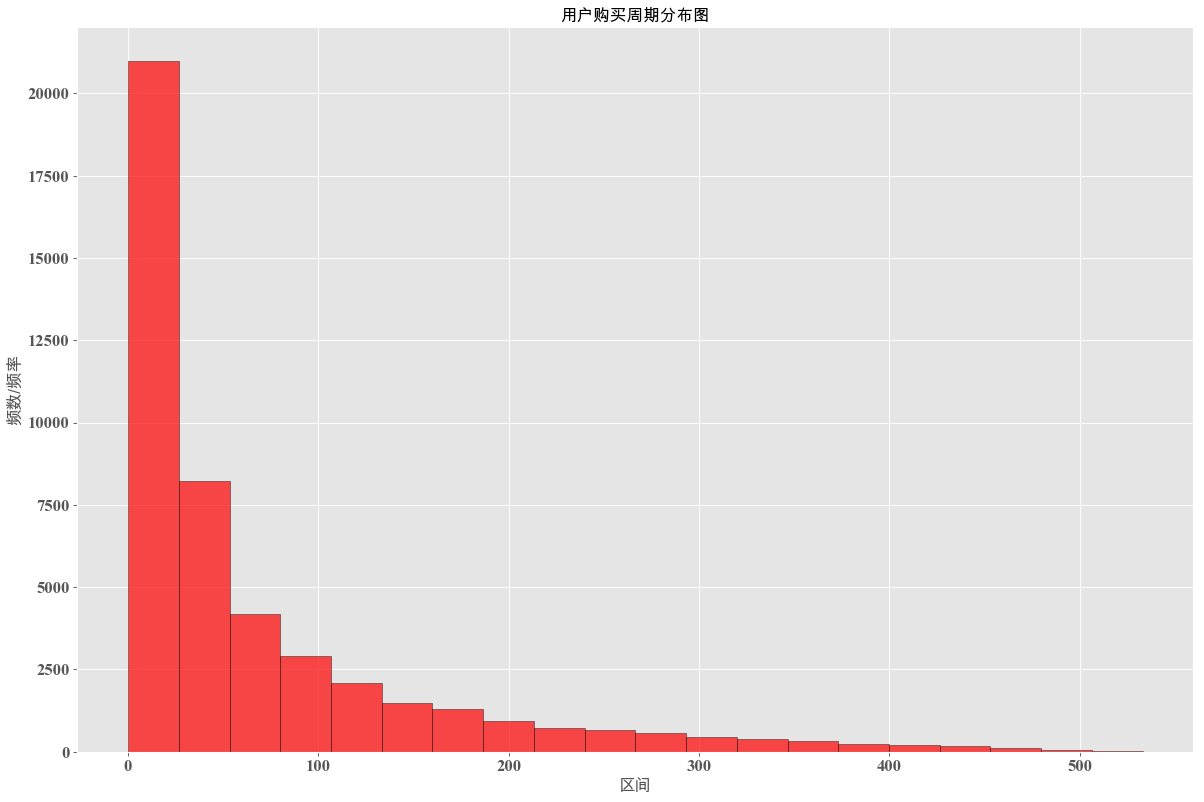

In [21]:
plt.figure(figsize=(18, 12), dpi=80)
plt.hist((order_diff / np.timedelta64(1, 'D')), bins=20, normed=0, facecolor="red", edgecolor="black", alpha=0.7)
plt.xlabel("区间",size = 15)
plt.xticks(fontproperties = 'Times New Roman',size =15)
plt.ylabel("频数/频率",size = 15)
plt.title('用户购买周期分布图' ,size = 15)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.show()

从结果可以看到：  
1. 订单的周期大致呈指数分布，绝大部分用户的购买周期集中在前100天。
2. 用户的平均购买周期是 68 天
3. 可以看到在购买后10天之内的用户重复购买的用户比较多，此时在消费10天发放优惠卷或代金券用于促进消费，消费后60天短信推送最新的信息比如优惠或是新发的专辑信息用于唤醒于用户。

###### 3.2.4.6 用户生命周期（按用户）

用户生命周期是指第一次消费至最后一次消费的时间。

In [28]:
#用户第一次消费的时间
oder_date_min = grouped_user["购买日期"].min()
#用户最后一次消费的时间
oder_date_max = grouped_user["购买日期"].max()
clc = (oder_date_max - oder_date_min).astype('timedelta64[D]')
clc.describe()

count    23570.000000
mean       134.871956
std        180.574109
min          0.000000
25%          0.000000
50%          0.000000
75%        294.000000
max        544.000000
Name: 购买日期, dtype: float64

客户的平均生命周期是135天，最长生命周期是544天。中位数 0 天，大部分用户第一次消费也是最后一次，这批属于低质量用户，而最大的是 544 天，几乎是数据集的总天数，这用户属于核心用户。

/Users/guo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


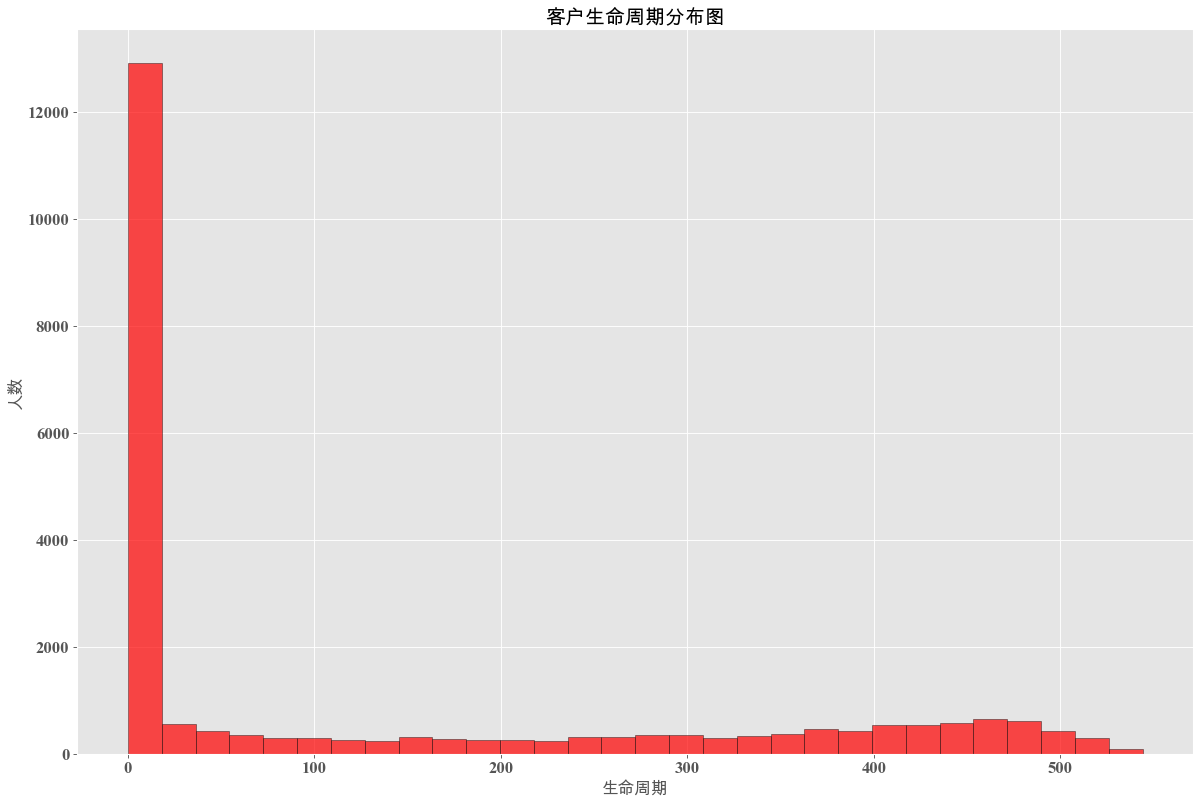

In [27]:
plt.figure(figsize=(18, 12), dpi=80)
plt.hist(clc, bins=30, normed=0, facecolor="red", edgecolor="black", alpha=0.7)
plt.xlabel("生命周期",size = 15)
plt.xticks(fontproperties = 'Times New Roman',size =15)
plt.ylabel("人数",size = 15)
plt.title('客户生命周期分布图' ,size = 18)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.show()

大部分用户的生命周期集中在前10天内，即大部分用户只消费了一次

/Users/guo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


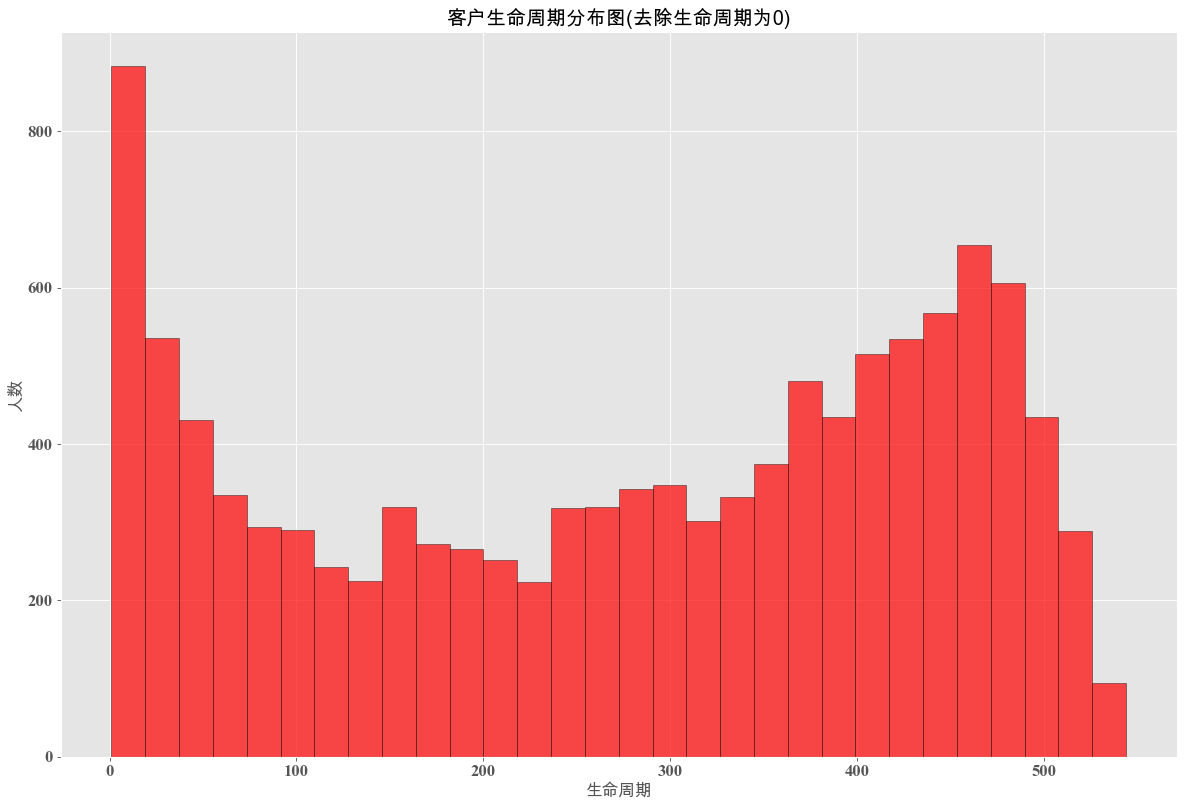

In [31]:
# 过滤生命周期为0 的
plt.figure(figsize=(18, 12), dpi=80)
plt.hist(clc[clc != 0], bins=30, normed=0, facecolor="red", edgecolor="black", alpha=0.7)
plt.xlabel("生命周期",size = 15)
plt.xticks(fontproperties = 'Times New Roman',size =15)
plt.ylabel("人数",size = 15)
plt.title('客户生命周期分布图(去除生命周期为0)' ,size = 18)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.show()

从结果可用看出：  
1. 生命周期在 50 天内的用户属于低质量用户，应采取尽量引导购买的措施，提高用户转化率。
2. 少部分用户集中在 50-300 天，属于普通用户，忠诚度一般。
3. 集中在 300-400 天以后的，属于忠诚用户。
4. 部分大于 400 天的用户已经属于核心用户，忠诚度极高，应尽量维护这批用户的利益。

In [32]:
clc[clc != 0].describe()

count    11516.000000
mean       276.044807
std        166.633990
min          1.000000
25%        117.000000
50%        302.000000
75%        429.000000
max        544.000000
Name: 购买日期, dtype: float64

对比结果可用看出：  
消费两次及以上的客户，其平均生命周期是276天，相较于总体平均值135天，提高了两倍。  
因此，用户首次消费后应该引导其进行再次消费，提高用户复购率，可以延长客户2倍的生命周期。

#### 3.3 复购率和回购率分析

##### 3.3.1 复购率分析

复购率: 在一个月内消费两次及以上的用户在总消费用户中占比

In [34]:
data.head()

,用户id,购买日期,订单数,金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [35]:
#计算每个用户在每月的购买次数
count_by_month = pd.pivot_table(
    data, 
    values = '购买日期', 
    index = '用户id', 
    columns = '月份', 
    aggfunc = 'count'
).fillna(0)
count_by_month.head()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#将数据转换一下，消费两次及以上记为1，消费一次记为0，没有消费记为NaN
count_by_month1 = count_by_month.applymap(lambda x: 1 if x >1 else np.NaN if x == 0 else 0)
count_by_month1.head()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [39]:
#计算复购率
repay_rate_by_month = count_by_month1.sum()/count_by_month1.count()
repay_rate_by_month

月份
1997-01-01    0.107571
1997-02-01    0.122288
1997-03-01    0.155292
1997-04-01    0.223600
1997-05-01    0.196929
1997-06-01    0.195810
1997-07-01    0.215138
1997-08-01    0.200339
1997-09-01    0.202415
1997-10-01    0.206634
1997-11-01    0.202170
1997-12-01    0.219957
1998-01-01    0.210800
1998-02-01    0.203095
1998-03-01    0.229612
1998-04-01    0.199026
1998-05-01    0.200269
1998-06-01    0.214475
dtype: float64

In [45]:
repay_rate_by_month.describe()

count    18.000000
mean      0.194745
std       0.033045
min       0.107571
25%       0.197453
50%       0.202292
75%       0.213557
max       0.229612
dtype: float64

从结果可用看出：  
1. 前三个月大量新客增加，复购率不高，在5%-15%之间，但在猪圈增加，在3月后的用户数开始稳定，使得复购较稳定，在20%左右。
2. 复购率的平均值为0.194745，说明在一个月内每5个消费者中中就有1个人消费两次及以上。

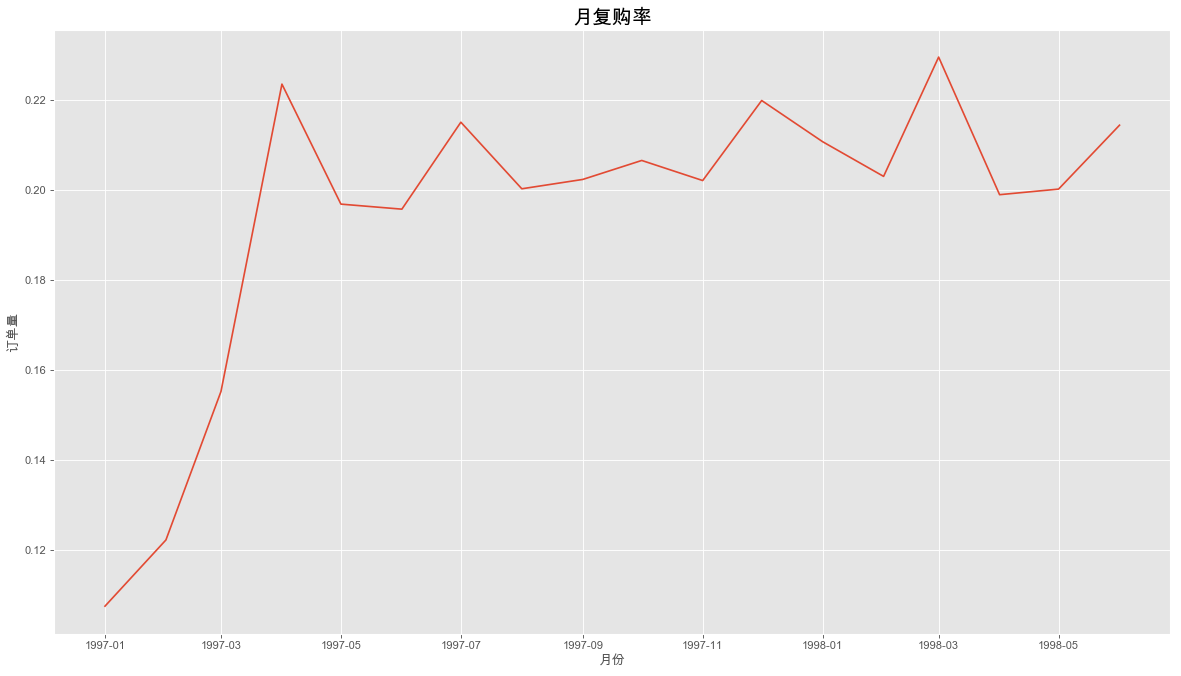

In [51]:
plt.figure(figsize=(18, 10), dpi=80)
plt.plot(repay_rate_by_month)
plt.xlabel('月份')
plt.ylabel('订单量')
plt.title('月复购率',size=18)
plt.show()

##### 3.3.2 回购率分析

月回购率：某个月内消费的用户，在下个月仍旧消费的占比。

In [47]:
#购买过的用户记为1，没购买过的记为0
pay_user = count_by_month.applymap(lambda x: 1 if x > 0 else 0)
pay_user.head()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [48]:
#回购用户函数：
def pay_return(data):
    pay_by_month = []
    
    for i in range(17):#循环17个月份
        if data[i] == 1:
            if data[i+1] == 1:
                pay_by_month.append(1)#如果本月购买过，且在下月也购买过，记为1
            if data[i+1] ==  0:
                pay_by_month.append(0)#如果本月购买过，且在下月没买，记为0
        else:
            pay_by_month.append(np.NaN)#其他情况记为NaN
    pay_by_month.append(np.NaN)#最后一列填充NaN值
    return pd.Series(pay_by_month,index = pay_user.columns)#将列表pay_by_month转换为series

In [49]:
pay_return_by_month =  pay_user.apply(pay_return, axis = 1)#对数据集的每一行使用函数
pay_return_by_month.head()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [50]:
#计算回购率
pay_return_rate = pay_return_by_month.sum()/pay_return_by_month.count()
pay_return_rate

月份
1997-01-01    0.147464
1997-02-01    0.174504
1997-03-01    0.186161
1997-04-01    0.301914
1997-05-01    0.337398
1997-06-01    0.318940
1997-07-01    0.277064
1997-08-01    0.297968
1997-09-01    0.305923
1997-10-01    0.339315
1997-11-01    0.311637
1997-12-01    0.274678
1998-01-01    0.307092
1998-02-01    0.368150
1998-03-01    0.251456
1998-04-01    0.319415
1998-05-01    0.299731
1998-06-01         NaN
dtype: float64

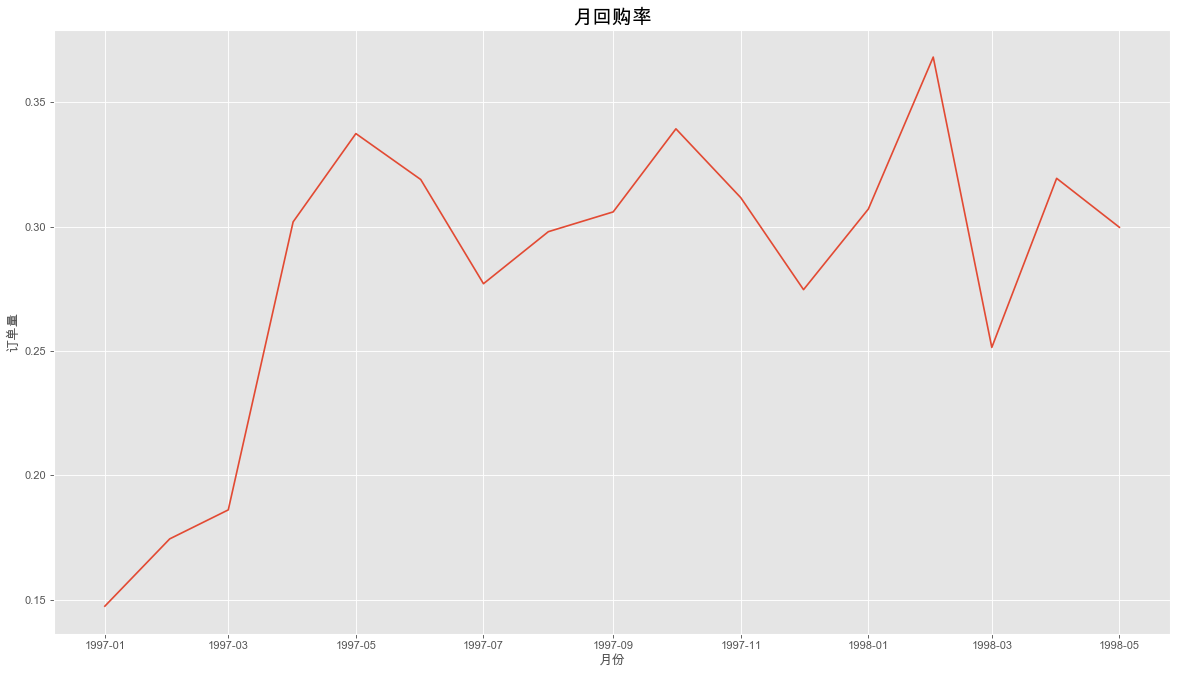

In [53]:
plt.figure(figsize=(18, 10), dpi=80)
plt.plot(pay_return_rate)
plt.xlabel('月份')
plt.ylabel('订单量')
plt.title('月回购率',size=18)
plt.show()

## 四、结论